In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from matplobblib.tvims import *

Коэффициент корреляции Пирсона измеряет линейную связь между переменными. 

Его значение можно интерпретировать следующим образом:

+1 – Полная положительная корреляция

+0.8 – Сильная положительная корреляция

+0.6 – Умеренная положительная корреляция

0 – Никакой корреляции вообще

-0,6 – Умеренная отрицательная корреляция

-0,8 – Сильная отрицательная корреляция

-1 – Полная отрицательная корреляция

# В экзамене

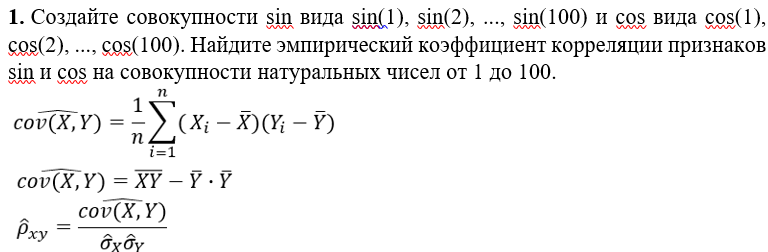

In [51]:
x = 
x_sin = 
x_cos = 

In [3]:
mean_sin = 
mean_cos = 
sigma_sin=
sigma_cos=
n=len(x)

In [ ]:
mean_sin, mean_cos

In [ ]:
sigma_sin, sigma_cos

__Первый способ__

In [6]:
# По формуле
cov = 
corr1 = 
print(f'Эмпирический коэффициент корреляции {corr1}')

Эмпирический коэффициент корреляции -0.0027337814423635805


__Второй способ__

In [ ]:
# Расчет эмп коэффициента корреляции в чистом Python numpy

corr2=np.mean(np.multiply((x_cos-mean_cos),(x_sin-mean_sin)))/(sigma_sin*sigma_cos)
print(f'Эмпирический коэффициент корреляции {corr2}')

__Третий способ__

In [ ]:
#corrcoef Получить матрицу коэффициентов корреляции (подобие векторов)
 
print(np.corrcoef(x_sin,x_cos))

__Четвёртый способ__

In [ ]:
#Расчет коэффициента корреляции с помощью Pandas
df = pd.DataFrame({'x_sin':x_sin,'x_cos':x_cos})
df

In [ ]:
r_sc = df['x_sin'].corr(df['x_cos'])
r_cs = df['x_cos'].corr(df['x_sin'])
print(f'Расчет эмпирического коэффициента корреляции методом .corr() библиотеки Pandas:\n {r_sc} и {r_cs}')

__Пятый способ__

In [ ]:
sts.pearsonr(df['x_sin'],df['x_cos'])[0]

# В экзамене

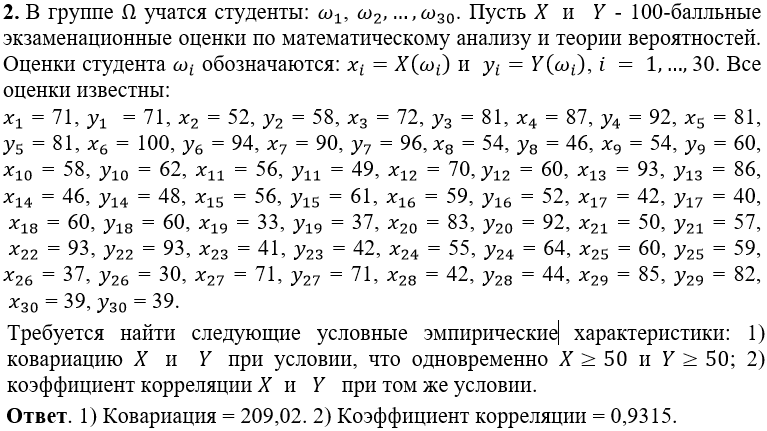

Модуль __Re (import re)__ — операции с регулярными выражениями.

__Регулярное выражение (Regular Expression, RegEx)__ — это мощный, гибкий и эффективный инструмент для сопоставления текста на основе заранее определенного шаблона. Т.е. регулярные выражения позволяют найти строки или наборы строк в тексте, используя специализированный синтаксис, с помощью которого описывается шаблон для поиска. Универсальные шаблоны регулярных выражений напоминают миниатюрный язык программирования, который предназначен для описания и разбора текста.

Зачем нужны регулярные выражения?

Они помогают быстро решить самые разные задачи при работе с данными:

Определить нужный формат данных, включая телефонный номер или e-mail адрес.

Разбивать строки на подстроки.

Искать, извлекать и заменять символы.

Быстро выполнять нетривиальные операции.

Модель RE также можно использовать для изменения строки или разделения ее на части различными способами.

__Метасимволы__ — это символы со специальным значением. 

В этой задаче будем использовать

|	- Чередование. Соответствует символам до или после символа |

Эмпирический коэффициент корреляции -0.0027337814423635805

In [19]:
def EC_3(text):
    """В группе Ω учатся студенты: ω1,...,ω`n`.
    Пусть X и Y – 100-балльные экзаменационные оценки
    по математическому анализу и теории вероятностей.
    Оценки студента ωi обозначаются: xi=X(ωi) и yi=Y(ωi),
    i=1,...,`n`. Все оценки известны: `text`.
    Требуется найти следующие условные эмпирические характеристики:
    - ковариацию X и Y при условии, что одновременно X⩾50 и Y⩾50;
    - коэффициент корреляции X и Y при том же условии.

    Args:
        text (str): Текст вида `xi=X(ωi), yi=Y(ωi),...` записанный в `'''_'''`

    ## Prints
        `answer` каждое значение по очереди.<br>C запятой вместо точки и сокращением до соответствующего количества знаков после запятой

    Returns:
        `answer` (tuple): Соответствующие величины
    """

    import re
    import numpy as np

    x_values = list(map(int, re.findall(r'[𝑥x]\d+\s?=\s?(\d+)', text)))
    y_values = list(map(int, re.findall(r'[𝑦y]\d+\s?=\s?(\d+)', text)))

    # Отфильтровать пары (X, Y), где X >= 50 и Y >= 50
    filtered_data = [(x, y) for x, y in zip(x_values, y_values) if x >= 50 and y >= 50]
    x_filtered, y_filtered = zip(*filtered_data)  # Разделяем на списки x и y

    # Рассчитать ковариацию
    cov_xy = np.cov(x_filtered, y_filtered, ddof=0)[0, 1]

    # Рассчитать коэффициент корреляции
    corr_xy = np.corrcoef(x_filtered, y_filtered)[0, 1]

    # Вывод результатов
    print('Ковариация = ' + rrstr(cov_xy,1))
    print('Коэффициент корреляции = ' + rrstr(corr_xy,3))
    
    return (cov_xy,corr_xy)

In [20]:
text = '''
 В группе Ω учатся студенты: 𝜔1, 𝜔2, … , 𝜔30. Пусть 𝑋 и 𝑌 - 100балл ьные
экзаменационные оценки по математическому анализу и теории вероятностей.
Оценки студента 𝜔𝑖 обозначаются: 𝑥𝑖 = 𝑋(𝜔𝑖) и 𝑦𝑖 = 𝑌(𝜔𝑖), 𝑖 = 1, …, 30. Все
оценки известны:
𝑥1 = 71, 𝑦1 = 71, 𝑥2 = 52, 𝑦2 = 58, 𝑥3 = 72, 𝑦3 = 81, 𝑥4 = 87, 𝑦4 = 92, 𝑥5 = 81,
𝑦5 = 81, 𝑥6 = 100, 𝑦6 = 94, 𝑥7 = 90, 𝑦7 = 96, 𝑥8 = 54, 𝑦8 = 46, 𝑥9 = 54, 𝑦9 = 60,
𝑥10 = 58, 𝑦10 = 62, 𝑥11 = 56, 𝑦11 = 49, 𝑥12 = 70, 𝑦12 = 60, 𝑥13 = 93, 𝑦13 = 86,
𝑥14 = 46, 𝑦14 = 48, 𝑥15 = 56, 𝑦15 = 61, 𝑥16 = 59, 𝑦16 = 52, 𝑥17 = 42, 𝑦17 = 40,
𝑥18 = 60, 𝑦18 = 60, 𝑥19 = 33, 𝑦19 = 37, 𝑥20 = 83, 𝑦20 = 92, 𝑥21 = 50, 𝑦21 = 57,
𝑥22 = 93, 𝑦22 = 93, 𝑥23 = 41, 𝑦23 = 42, 𝑥24 = 55, 𝑦24 = 64, 𝑥25 = 60, 𝑦25 = 59,
𝑥26 = 37, 𝑦26 = 30, 𝑥27 = 71, 𝑦27 = 71, 𝑥28 = 42, 𝑦28 = 44, 𝑥29 = 85, 𝑦29 = 82,
𝑥30 = 39, 𝑦30 = 39.
Требуется найти следующие условные эмпирические характеристики: 1)
ковариацию 𝑋 и 𝑌 при условии, что одновременно 𝑋 ≥ 50 и 𝑌 ≥ 50; 2)
коэффициент корреляции 𝑋 и 𝑌 при том же условии.
'''
EC_3(text)

Ковариация = 209,0
Коэффициент корреляции = 0,931


(209.0204081632653, 0.9314919526701531)

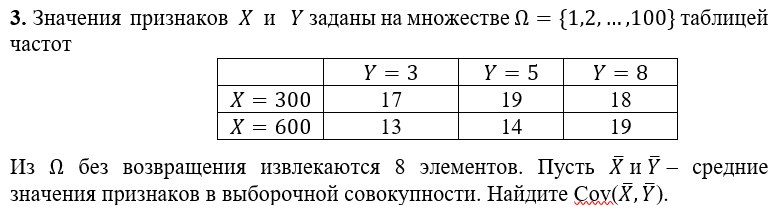

In [21]:
X = np.array([300,600])
Y = np.array([3,5,8])
n_XY = np.array([[17,19,18],[13,14,19]])
N = n_XY.sum()
n = 8
N

100

In [24]:
n_X = np.sum(n_XY,1)
n_X

array([54, 46])

In [25]:
n_Y = np.sum(n_XY,0)
n_Y

array([30, 33, 37])

In [30]:
x0_gen = np.dot(X,n_X)/N
x0_gen

438.0

In [31]:
y0_gen= np.dot(Y,n_Y)/N
y0_gen

5.51

In [41]:
n_XY

array([[17, 19, 18],
       [13, 14, 19]])

In [55]:
np.sum(np.multiply(X.reshape(-1,1)*Y,n_XY))/N - x0_gen*y0_gen

22.61999999999989

In [57]:
# Вычислим генеральную ковариацию Cov_gen
Cov_gen = np.sum(np.multiply(X.reshape(-1,1)*Y,n_XY))/N - x0_gen*y0_gen

In [58]:
Cov_XY_sr = Cov_gen/n * (N-n)/(N-1)
Cov_XY_sr

2.627575757575745

# В экзамены

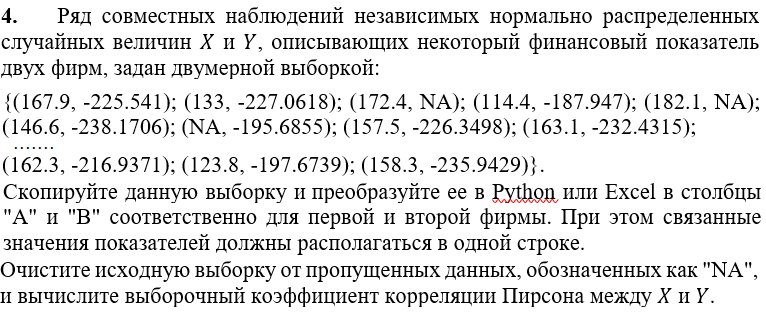

In [2]:
import re
import pandas as pd
data='''{(167.9, -225.541); (133, -227.0618); (172.4, NA); (114.4, -187.947); (182.1, NA); (146.6, -238.1706); (NA, -195.6855); (157.5, -226.3498); (163.1, -232.4315);  (164.6, -219.3768); (139.1, -205.4677); (112.9, NA); (149.6, -221.0258);  (166.8, -190.341); (153.8, -219.2795); (NA, -198.8605); (87.5, -207.1957);  (175.2, NA); (198.5, -277.6407); (147.7, -215.5379); (186, -209.1277);  (150.9, -252.0035); (178.7, -221.1615); (143.3, -264.381); (148, -200.406);  (NA, -291.3722); (184.8, -209.8789); (151.5, NA); (151.3, NA); (159.8, -261.9098); (124.5, -248.9302); (140, NA); (164.7, NA); (186.4, -255.7522); (154.5, -259.0014); (182.9, -222.0292); (112.8, -209.1327); (132.1, -224.1615); (180.5, -178.7437); (141.6, -261.1121); (157.8, -247.9286); (211, -209.7416); (136.9, -241.0031);  (124.6, -276.8816); (109.4, -233.4274); (162.9, -235.5742); (130.8, NA);  (187.5, -231.0311); (183.5, -232.3752); (193.9, -188.5517); (165, -257.8477);  (184.5, -236.9394); (164.4, -225.4218); (166.1, -216.091); (241.3, -197.7659); (141.8, -219.751); (NA, -207.4731); (NA, -240.3647); (NA, -258.889);  (136.6, -217.16); (194.5, -261.1401); (157.6, NA); (149.6, -213.3036);  (152.5, -288.5258); (170.4, -241.9711); (NA, -243.0995); (133.6, -232.4539);  (139.1, -214.5584); (111.7, NA); (138.1, -271.9439); (166.3, -204.7177);  (185.6, NA); (160.4, -229.6342); (152.4, -237.8129); (197.6, -207.0127);  (149.8, NA); (180.7, -215.8441); (156.1, -221.4436); (130.5, -286.4889);  (140, -235.5511); (NA, -229.0371); (143.1, -257.7442); (177.6, -220.4417);  (124.7, -256.3137); (142, -218.7544); (143.6, -260.6194); (121.3, -186.2013);  (78.2, -173.376); (155.9, -261.1379); (137.6, -237.259); (170.8, -204.3441);  (156.8, -212.3563); (128.4, -200.0559); (NA, -238.497); (129.3, -238.3039);  (147.1, -257.0837); (117.9, -205.2149); (174.3, -247.1452); (163.2, -194.3524); (151.5, -219.2332); (153.3, -192.9653); (148.4, -215.8789); (174.8, -205.3518); (84.2, -197.7495); (163.6, -227.4809); (205.5, -250.75); (169.8, -211.6129);  (NA, -188.3579); (116.9, NA); (205.5, -180.5642); (181.1, -195.1596);  (137.4, -222.561); (140.5, -255.2292); (125, -221.2531); (212.9, -196.9889);  (152.7, -200.074); (137.4, NA); (142.8, -201.6862); (178.4, -232.8285);  (165.1, -208.838); (NA, -240.8741); (134.3, -224.8478); (180.5, -229.5657);  (122.8, -204.9998); (179.7, -272.7181); (163.8, -239.3508); (182.2, -232.8887); (172.8, -220.529); (NA, -221.5642); (NA, -195.5116); (151, -222.4601);  (NA, -256.248); (204.2, -230.9828); (182.9, -234.9166); (219.3, -198.5935);  (153.4, NA); (85.1, -201.3523); (214.6, -226.9573); (96.2, -245.2855);  (153, -261.5914); (112.8, -212.7011); (NA, -244.1466); (NA, -213.4919);  (153.3, -239.8558); (177.6, -272.8503); (158.6, -314.0774); (NA, -249.3596);  (162.3, -216.9371); (123.8, -197.6739); (158.3, -235.9429)}'''
# Регулярное выражение для поиска пар (число или NA, число или NA)
pattern = r"\(([^,]+),\s*([^)]+)\)"

# Используем регулярное выражение, чтобы найти все пары значений
matches = re.findall(pattern, data)
cleaned_data = [(float(x) if x != 'NA' else None, float(y) if y != 'NA' else None) for x, y in matches]

# Создаем DataFrame
df = pd.DataFrame(cleaned_data, columns=['X', 'Y'])

df = df.dropna()
df.corr('pearson').iloc[0,1]

-0.014780425962113066

In [74]:
sts.pearsonr(df.iloc[:,0],df.iloc[:,1])[0]

-0.014780425962113056

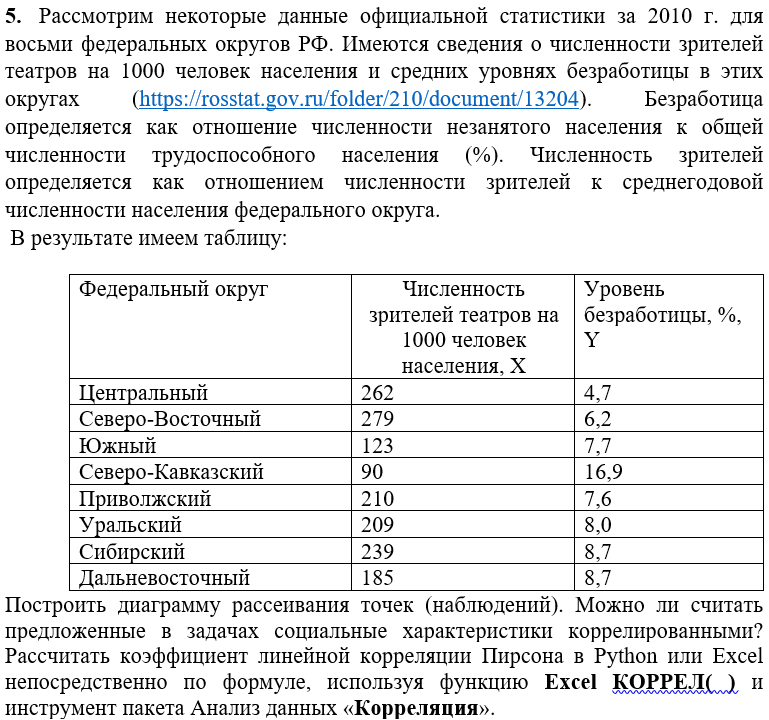

In [3]:
t = """Центральный 262 4,7 Северо-Восточный 279 6,2 Южный 123 7,7 Северо-Кавказский 90 16,9 Приволжский 210 7,6 Уральский 209 8,0 Сибирский 239 8,7 Дальневосточный 185 8,7""".split(' ')
pd.DataFrame(np.array(t).reshape(len(t)//3,3)).set_index(0)

,1,2
0,,
Центральный,262,"4,7"
Северо-Восточный,279,"6,2"
Южный,123,"7,7"
Северо-Кавказский,90,"16,9"
Приволжский,210,"7,6"
Уральский,209,"8,0"
Сибирский,239,"8,7"
Дальневосточный,185,"8,7"


In [37]:
title=["Центральный","Северо-Восточный","Южный","Северо-Кавказский","Приволжский","Уральский","Сибирский","Дальневосточный"]
data1 = [262,279,123,90,210,209,239,185]
data2 = [4.7,6.2,7.7,16.9,7.6,8,8.7,8.7]
df = pd.DataFrame({"Федеральный округ": title,"Численность зрителей театров,X": data1, "Уровень безработицы, %,Y": data2})
df

,Федеральный округ,"Численность зрителей театров,X","Уровень безработицы, %,Y"
0,Центральный,262,4.7
1,Северо-Восточный,279,6.2
2,Южный,123,7.7
3,Северо-Кавказский,90,16.9
4,Приволжский,210,7.6
5,Уральский,209,8.0
6,Сибирский,239,8.7
7,Дальневосточный,185,8.7


In [38]:
import seaborn as sns

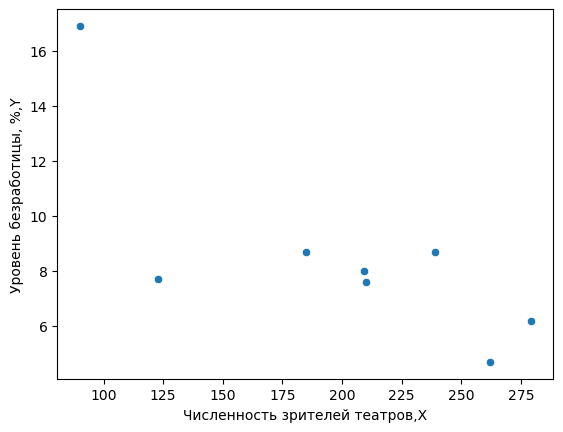

In [39]:
sns.scatterplot(data=df, x="Численность зрителей театров,X", y="Уровень безработицы, %,Y");

In [40]:
r_AB = df["Численность зрителей театров,X"].corr(df["Уровень безработицы, %,Y"])

print(f'Коэффициент корреляции Пирсона методом .corr() библиотеки Pandas:', r_AB)

Коэффициент корреляции Пирсона методом .corr() библиотеки Pandas: -0.7747348502644791


In [41]:
# Или так

In [42]:
sts.pearsonr(df["Численность зрителей театров,X"],df["Уровень безработицы, %,Y"])[0]

-0.7747348502644793

In [43]:
sts.spearmanr(df["Численность зрителей театров,X"], df["Уровень безработицы, %,Y"])[0]

-0.7065994945288228

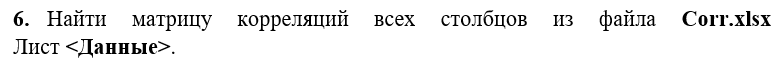

In [44]:
df = pd.read_excel("Corr.xlsx")
df

,A,B,C,D,E,F
0,196.92971,203.29,-173.6,232.98,222.553,200.248
1,150.50897,198.23,-225.9,170.56,224.344,NaN
2,NaN,260.40,-170.4,350.40,245.684,199.434
3,196.34805,217.22,-232.5,201.94,225.249,157.329
4,199.53462,205.53,-177.4,233.66,243.334,227.758
...,...,...,...,...,...,...
1986,187.85196,211.57,-203.2,219.94,245.336,216.695
1987,216.00879,200.67,NaN,NaN,226.936,158.995
1988,172.26613,258.97,-297.1,220.84,254.601,180.376
1989,168.49979,198.79,-194.4,203.18,231.549,194.097


In [46]:
numeric_col = ['A','B','C','D','E','F']

In [47]:
df1=df[~df.isin([np.nan]).any(1)].loc[:,numeric_col]
df1

C:\Users\Comp\AppData\Local\Temp\ipykernel_20020\3056864782.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df1=df[~df.isin([np.nan]).any(1)].loc[:,numeric_col]


,A,B,C,D,E,F
0,196.92971,203.29,-173.6,232.98,222.553,200.248
3,196.34805,217.22,-232.5,201.94,225.249,157.329
4,199.53462,205.53,-177.4,233.66,243.334,227.758
5,170.20138,219.82,-206.7,232.94,231.286,185.213
6,197.97725,252.93,-158.4,347.46,257.488,176.852
...,...,...,...,...,...,...
1985,231.75057,224.82,-175.2,274.44,253.032,205.601
1986,187.85196,211.57,-203.2,219.94,245.336,216.695
1988,172.26613,258.97,-297.1,220.84,254.601,180.376
1989,168.49979,198.79,-194.4,203.18,231.549,194.097


In [48]:
# Correlation Matrix formation
corr_matrix = df1.corr()
print(corr_matrix)

          A         B         C         D         E         F
A  1.000000 -0.001140 -0.018764 -0.009172 -0.004594  0.003374
B -0.001140  1.000000 -0.020512  0.901167 -0.003381 -0.000432
C -0.018764 -0.020512  1.000000  0.414896  0.014284  0.008233
D -0.009172  0.901167  0.414896  1.000000  0.003116  0.003176
E -0.004594 -0.003381  0.014284  0.003116  1.000000 -0.002472
F  0.003374 -0.000432  0.008233  0.003176 -0.002472  1.000000


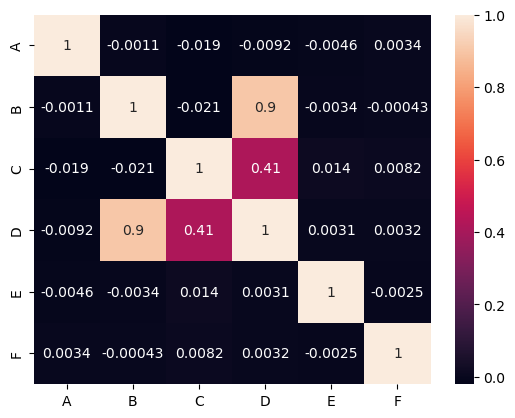

In [49]:
#Using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True);